In [1]:
import importlib

import os
import pathlib

In [2]:
OAS_FILE_DIR = r'../../datasets/OAS'
DATASET_DIR = r'../datasets'

In [3]:
ONLY_HUMAN = True
GERMLINE_INFO = 'all'

PARAMETERS = ''

if ONLY_HUMAN: PARAMETERS += 'only_human'
PARAMETERS += '-germline_{}'.format(GERMLINE_INFO)

#ADDITIONAL = '-SMALL'
ADDITIONAL = ''

PARAMETERS += ADDITIONAL
PARAMETERS

'only_human-germline_all'

In [4]:
DIR = '{}/{}'.format(DATASET_DIR, PARAMETERS)
if not pathlib.Path(DIR).exists():
    os.mkdir(DIR)

### Read Raw Data

In [5]:
import read_raw

In [6]:
GERMLINE_IDS_FILE = '{}/germline.csv'.format(
    DIR,
)
SEQUENCES_FILE = '{}/sequences.csv'.format(
    DIR
)

SUBSAMPLE = None

In [7]:
COMPUTE_NEW = False

In [11]:
importlib.reload(read_raw)
if COMPUTE_NEW:
    read_raw.read_raw(location=OAS_FILE_DIR, output_location=SEQUENCES_FILE, 
                      germline_ids_location=GERMLINE_IDS_FILE,
                      subsample=SUBSAMPLE, only_human=ONLY_HUMAN, which_germline=GERMLINE_INFO)

Reading data...
Found 310 files.
human:                280
mouse_C57BL/6:          2
mouse_BALB/c:           8
rat_SD:                20


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [04:32<00:00,  1.03it/s]


Filtering the data
Initial number of rows: 1954079
Removed 331160 rows (-16.947%), new number of rows: 1622919.
Assining ids...
Number of unique heavy: 1604717
Number of unique light: 699889
Number of unique pairs:  1622674
Cleaning the germlines...
                                                     heavy  \
0        QVQLVQSGAEVKKPGASVKVSCKASGYTFTGYYMHWVRQAPGQGLE...   
1        QVQLVQSGAEVKKPGASVKVSCKASGYTFTSYAMHWVRQAPGQRLE...   
2        EVQLVESGGGLVKPGGSLRLSCAASGFTFSNAWMSWVRQAPGKGLE...   
3        EVQLLESGGGLVQPGGSLRLSCAASGFTFSSYAMSWVRQAPGKGLE...   
4        EVQLLESGGGLVQPGGSLRLSCAASGFTFSSYAMSWVRQAPGKGLE...   
...                                                    ...   
1622914  QVQLVESGGGLVKPGGSLRLSCAASGFTFSDYYMSWIRQAPGKGLE...   
1622915  QVQLVQSGAEVKKPGASVKVSCKASGFALTSYSLHWVRQAPGQGLE...   
1622916  EVQLLESGGNLVQPGGSLRLSCAASEFTFTIYAMHWVRQAPGKGLE...   
1622917  QVQLQESGPGLVKPSGTLSLTCAVSGGSISSNNCWTWVRQPPGKGL...   
1622918  QVQLVQSGAEVKKPGASVKVSCKASGYTFTGYYMHWVRQAPGQGLE...   

     

In [13]:
GERMLINE_IDS_FILE

'../datasets/only_human-germline_all/germline.csv'

In [14]:
SEQUENCES_FILE

'../datasets/only_human-germline_all/sequences.csv'

### Random Pairing

In [8]:
import random_pairing

In [9]:
RANDOM_PAIRING_FILE = '{}/random_pairing.csv'.format(
    DIR,
)

NUMBER = None

In [10]:
COMPUTE_NEW = False

In [10]:
importlib.reload(random_pairing)
if COMPUTE_NEW:
    random_pairing.random_pairing(location=SEQUENCES_FILE, germline_ids_location=GERMLINE_IDS_FILE,
                                  output_location=RANDOM_PAIRING_FILE, n=NUMBER)

Sampling 1622802 random pairs
Saved: ../datasets/only_human-germline_all/random_pairing.csv


### Germline Pairing

In [11]:
import germline_pairing

In [12]:
ALPHA = 1000
GERMLINE_PAIRING_FILE = '{}/germline_pairing-{}.csv'.format(
    DIR,
    'alpha_{}'.format(ALPHA)
)

NUMBER = None

In [13]:
COMPUTE_NEW = False

In [14]:
importlib.reload(germline_pairing)
if COMPUTE_NEW:
    germline_pairing.germline_pairing(location=SEQUENCES_FILE, germline_ids_location=GERMLINE_IDS_FILE,
                                      output_location=GERMLINE_PAIRING_FILE, alpha=ALPHA, n=NUMBER)

9928 out of 22344 of only zeros


  8%|████████                                                                                                | 770/9928 [04:01<47:53,  3.19it/s]


KeyboardInterrupt: 

In [18]:
GERMLINE_PAIRING_FILE

'../datasets/only_human-germline_all/germline_pairing-alpha_1000.csv'

### Generate FASTA

In [14]:
import generate_fasta

In [15]:
COMPUTE_NEW = True

In [16]:
if COMPUTE_NEW:
    if not pathlib.Path('{}/fasta_files/'.format(DIR)).exists():
        os.mkdir('{}/fasta_files/'.format(DIR))
    generate_fasta.generate_fasta(SEQUENCES_FILE, '{}/fasta_files/sequences.fasta'.format(DIR))
    generate_fasta.generate_fasta(RANDOM_PAIRING_FILE, '{}/fasta_files/random_pairing.fasta'.format(DIR))
    generate_fasta.generate_fasta(GERMLINE_PAIRING_FILE, '{}/fasta_files/germline_pairing.fasta'.format(DIR))

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1622802/1622802 [01:11<00:00, 22568.06it/s]


Saved: ../datasets/only_human-germline_all/fasta_files/sequences.fasta


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1622802/1622802 [01:11<00:00, 22792.04it/s]


Saved: ../datasets/only_human-germline_all/fasta_files/random_pairing.fasta


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1622802/1622802 [01:11<00:00, 22794.68it/s]


Saved: ../datasets/only_human-germline_all/fasta_files/germline_pairing.fasta


### Clustering

In [17]:
import os
import pathlib

CLUSTERING_DIR = '{}/clustering'.format(
    DIR,
)

if not pathlib.Path(CLUSTERING_DIR).exists():
    os.makedirs(CLUSTERING_DIR)

MIN_SEQ_ID = 0.8

commands = 'source cluster.sh {} {} {} {}\n'.format(
    DIR, 
    'fasta_files/sequences.fasta', 
    'clustering/sequences', 
    MIN_SEQ_ID
)

commands += 'source cluster.sh {} {} {} {}\n'.format(
    DIR, 
    'fasta_files/random_pairing.fasta', 
    'clustering/random_pairing', 
    MIN_SEQ_ID
)

commands += 'source cluster.sh {} {} {} {}\n'.format(
    DIR, 
    'fasta_files/germline_pairing.fasta', 
    'clustering/germline_pairing', 
    MIN_SEQ_ID
)

commands += 'rm -rf {}/fasta_files'.format(DATASET_DIR)

with open('clustering_commands.sh', 'w') as f:
    f.write(commands)

### Split

In [18]:
import split

In [21]:
SEQUENCES_CLUSTER = '{}/sequences.tsv'.format(CLUSTERING_DIR)
RANDOM_PAIRING_CLUSTER = '{}/random_pairing.tsv'.format(CLUSTERING_DIR)
GERMLINE_PAIRING_CLUSTER = '{}/germline_pairing.tsv'.format(CLUSTERING_DIR)

ONLY_REPRESENTATIVE = False

OUTPUT_DIRECTORY = '{}/splits'.format(DIR)

if ONLY_REPRESENTATIVE: OUTPUT_DIRECTORY += '-only-representative'

if not pathlib.Path(OUTPUT_DIRECTORY).exists():
    os.mkdir(OUTPUT_DIRECTORY)

#OUTPUT_DIRECTORY = '{}/splits{}{}'.format(
#    DATASET_DIR, 
#    '' if PARAMETERS == '' else '-' + PARAMETERS,
#    '' if ONLY_REPRESENTATIVE is False else '-only_representative'
#)

OUTPUT_DIRECTORY

'../datasets/only_human-germline_all/splits'

In [22]:
COMPUTE_NEW = True

In [23]:
importlib.reload(split)
if COMPUTE_NEW:
    split.split(SEQUENCES_CLUSTER, RANDOM_PAIRING_CLUSTER, 
                SEQUENCES_FILE, RANDOM_PAIRING_FILE,
                proportions=[50, 25, 25], output_location=OUTPUT_DIRECTORY,
                only_representative=True,
                additional_name='random')
    split.split(SEQUENCES_CLUSTER, GERMLINE_PAIRING_CLUSTER, 
                SEQUENCES_FILE, GERMLINE_PAIRING_FILE,
                proportions=[50, 25, 25], output_location=OUTPUT_DIRECTORY,
                only_representative=True,
                additional_name='germline')

There are 1622802 paired sequences with 1357063 clusters.
There are 1622802 negative paired sequences with 1368195 clusters.
../datasets/only_human-germline_all/splits/train_random.csv
There are 1622802 paired sequences with 1357063 clusters.
There are 1622802 negative paired sequences with 1212314 clusters.
../datasets/only_human-germline_all/splits/train_germline.csv


### Run this test

Per eviteare di creare un altro fine ho messo tutto qua, anche l'analisi.

In [4]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from random import sample
from itertools import combinations
from Levenshtein import distance

import generate_fasta

In [5]:
HEAVY_FASTA_FILE = '{}/test/heavy_fasta.fasta'.format(DATASET_DIR)

In [6]:
generate_fasta.generate_fasta(SEQUENCES_FILE, HEAVY_FASTA_FILE, which='heavy')

100%|██████████████████████████████| 1674216/1674216 [01:10<00:00, 23839.24it/s]


Saved: ../datasets/test/heavy_fasta.fasta


In [64]:
# Read the cluster data

heavy_clusters = pd.read_csv('../datasets/test/heavy_cluster.tsv', sep='\t', header=None).rename(
    {
        0: 'Representative',
        1: 'Sequence'
    },
    axis=1
).drop_duplicates()

In [65]:
cluster_sizes = [len(d) for _, d in heavy_clusters.groupby('Representative')]

print('{:>22}{:8}'.format('Number of sequences:', sum(cluster_sizes)))
print('{:>22}{:8}'.format('Number of clusters:', len(cluster_sizes)))
print('{:>22}{:8.2f}'.format('Average:', sum(cluster_sizes) / len(cluster_sizes)))
print('{:>22}{:8}'.format('Number of singleton:', len(list(filter(lambda x: x == 1, cluster_sizes)))))
print('{:>22}{:8}'.format('Biggest cluster:', max(cluster_sizes)))

  Number of sequences: 1655037
   Number of clusters:  849219
              Average:    1.95
  Number of singleton:  764724
      Biggest cluster:   41029


In [66]:
counter = defaultdict(int)
for i in cluster_sizes:
    counter[i] += 1

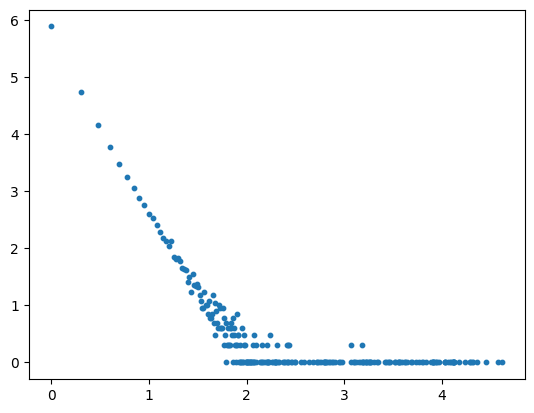

In [67]:
fig, axs = plt.subplots(1)

axs.scatter(np.log10(sorted(counter.keys())), np.log10([counter[k] for k in sorted(counter.keys())]), s=10)

In [68]:
cluster_sizes_dict = {
    'Representative': [],
    'size': []
}
for seq_id, data in heavy_clusters.groupby('Representative'):
    cluster_sizes_dict['Representative'].append(seq_id)
    cluster_sizes_dict['size'].append(len(data))

cluster_sizes = pd.DataFrame(cluster_sizes_dict)

In [69]:
# Filter out all the clusters having a size smaller then the minimal

min_cluster_size = 5
cluster_sizes = cluster_sizes[cluster_sizes['size'] >= min_cluster_size]

heavy_clusters = heavy_clusters.merge(cluster_sizes)
heavy_clusters = heavy_clusters[['Representative', 'Sequence']]

In [70]:
# Sample a number of clusters

to_sample = 1000

representative_sample = heavy_clusters['Representative'].drop_duplicates().sample(to_sample)
heavy_clusters = heavy_clusters.merge(representative_sample)

In [74]:
sequences = pd.read_csv('../datasets/sequences-only_human-germline_j.csv', index_col=0)
sequences_heavy = sequences[['heavy_id', 'heavy']].drop_duplicates()

In [79]:
representative_sequences_sample = sequences_heavy.merge(heavy_clusters, left_on='heavy_id', right_on='Representative')
representative_sequences_sample = representative_sequences_sample['heavy'].drop_duplicates()

In [80]:
inter_cluster_distances = []
for x, y in combinations(representative_sequences_sample, 2):
    inter_cluster_distances.append(distance(x, y))

In [81]:
print('Inter-clusters distance:')
print('{:>10}{:6.2f} +/- {:6.2f}'.format('mean:', np.mean(inter_cluster_distances), np.std(inter_cluster_distances)))
print('{:>10}{:6}'.format('max:', max(inter_cluster_distances)))
print('{:>10}{:6}'.format('min:', min(inter_cluster_distances)))

Inter-clusters distance:
     mean: 58.09 +/-  16.01
      max:   102
      min:     6


In [85]:
clusters_sequences_sample = sequences_heavy.merge(heavy_clusters, left_on='heavy_id', right_on='Sequence')
clusters_sequences_sample

,heavy_id,heavy,Representative,Sequence
0,2,QVQLVQSGAEVKKPGASVKVSCKASGYTFTSYAMHWVRQAPGQRLE...,547004,2
1,3,EVQLVESGGGLVKPGGSLRLSCAASGFTFSNAWMSWVRQAPGKGLE...,698646,3
2,7,QVQLVQSGAEVKKPGSSVKVSCKASGGTFSSYAISWVRQAPGQGLE...,653555,7
3,22,EVQLVESGGGLVKPGGSLRLSCAASGFTFSNAWMSWVRQAPGKGLE...,698646,22
4,31,QVQLQESGPGLVKPSGTLSLTCAVSGGSISSSNWWSWVRQPPGKGL...,264473,31
...,...,...,...,...
113914,1654756,QVQLVQSGAEVKKPGSSVKVSCKASGGTFSSYAISWVRQAPGQGLE...,653555,1654756
113915,1654757,QVTLKESGPALVKPTQTLTLTCAFSGFSLSTSGMRVSWIRQPPGKA...,1390728,1654757
113916,1654779,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,744750,1654779
113917,1654844,QVQLVESGGGVVQPGGSLRLSCAASGFTFSSYGMHWVRQAPGKGLE...,346543,1654844


In [91]:
intra_cluster_distances = []
for _, data in clusters_sequences_sample.groupby('Representative'):
    for x, y in combinations(data['heavy'].sample(5), 2):
        intra_cluster_distances.append(distance(x, y))   

In [92]:
print('Intra-clusters distance:')
print('{:>10}{:6.2f} +/- {:6.2f}'.format('mean:', np.mean(intra_cluster_distances), np.std(intra_cluster_distances)))
print('{:>10}{:6}'.format('max:', max(intra_cluster_distances)))
print('{:>10}{:6}'.format('min:', min(intra_cluster_distances)))

Intra-clusters distance:
     mean: 13.06 +/-   7.13
      max:    41
      min:     1


In [98]:
sequences_light = sequences[['heavy_id', 'light']].drop_duplicates()

In [100]:
representative_sequences_sample = sequences_light.merge(heavy_clusters, left_on='heavy_id', right_on='Representative')
representative_sequences_sample = representative_sequences_sample['light'].drop_duplicates()
representative_sequences_sample

0         DIQMTQSPSSLSASVGDRVTITCRASQGISNYLAWFQQKPGKAPKS...
8         DIVMTQSPLSLPVTPGEPASISCRSSQSLLHSNGYNYLDWYLQKPG...
19        DIQLTQSPSFLSASVGDRVTITCRASQGINSYLAWYQQKPGKAPRL...
25        QSALTQPPSASGSPGQSVTISCTGTSSDVGGSNFVSWYQQYPGKAP...
35        DIQMTQSPSTLSASVGDRVTITCRASQSFSNWLAWYQQKPGKAPKL...
                                ...                        
115008    QSALTQPASVSGSPGQSITISCTGTSSDVGYYNYVSWYQHHPGKAP...
115013    QSALTQPPSASGSPGQSVTISCTGTSSDVGGYNYVSWYQQHPGKAP...
115018    DVVMTQSPLSLPVTLGQPASISCRSSQSLVHRDGNTYLNWFQQRPG...
115023    QSALTQPPSASGSPGQSVTISCTGTSSDVGGYKYVSWYQQLPGKAP...
115028    DIVLTQSPDSLAVSLGERATINCKSSQSVLSRSNNKNYLGWYQQKP...
Name: light, Length: 1079, dtype: object

In [101]:
inter_cluster_distances = []
for x, y in combinations(representative_sequences_sample, 2):
    inter_cluster_distances.append(distance(x, y))

In [102]:
print('Inter-clusters distance:')
print('{:>10}{:6.2f} +/- {:6.2f}'.format('mean:', np.mean(inter_cluster_distances), np.std(inter_cluster_distances)))
print('{:>10}{:6}'.format('max:', max(inter_cluster_distances)))
print('{:>10}{:6}'.format('min:', min(inter_cluster_distances)))

Inter-clusters distance:
     mean: 47.16 +/-  15.53
      max:    85
      min:     1


In [103]:
clusters_sequences_sample = sequences_light.merge(heavy_clusters, left_on='heavy_id', right_on='Sequence')
clusters_sequences_sample

,heavy_id,light,Representative,Sequence
0,2,SYELTQPPSVSVSPGQTARITCSGDALPKQYAYWYQQKPGQAPVLV...,547004,2
1,3,SYELTQPPSVSVSPGQTARITCSGDALPKKYAYWYQQKSGQAPVLV...,698646,3
2,7,DVVMTQSPLSLPVTLGQPASISCRSSQSLVYSDGNTYLNWFQQRPG...,653555,7
3,22,DIVMTQSPLSLPVTPGEPASISCRSSQSLLHSNGYNYLDWYLQKPG...,698646,22
4,31,DIQMTQSPSSLSASVGDRVTITCRASQGISNYLAWFQQKPGKAPKS...,264473,31
...,...,...,...,...
114637,1654756,DVVMTQSPLSLPVTLGQPASISCRSSQSLVHSDGNTYLNWFQQRPG...,653555,1654756
114638,1654757,QTVVTQEPSFSVSPGGTVTLTCGLSADSVSTRHYPSWYQQSPGQPP...,1390728,1654757
114639,1654779,DIVMTQSPLSLPVTPGEPASISCRSSQSLLHSNGYNYLDWYLQKPG...,744750,1654779
114640,1654844,SYELTQPPSVSVSPGQTARITCSGDALPKKYAYWYQQKSGQAPVLV...,346543,1654844


In [105]:
intra_cluster_distances = []
for _, data in clusters_sequences_sample.groupby('Representative'):
    for x, y in combinations(data['light'].sample(5), 2):
        intra_cluster_distances.append(distance(x, y))   

In [106]:
print('Intra-clusters distance:')
print('{:>10}{:6.2f} +/- {:6.2f}'.format('mean:', np.mean(intra_cluster_distances), np.std(intra_cluster_distances)))
print('{:>10}{:6}'.format('max:', max(intra_cluster_distances)))
print('{:>10}{:6}'.format('min:', min(intra_cluster_distances)))

Intra-clusters distance:
     mean: 25.71 +/-  22.77
      max:    80
      min:     0
